In [2]:
# import standard libraries
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
import time

# import our libraries
import bayes_helpers as bh
from utils import generate_data, run_toy_nn
from feed_forward import Feedforward
from nlm import NLM
from luna import LUNA

from config import *

### Generate Cubic Dataset

Generates 100 datapoints for train and 100 points for test according to the function

$$y = x^3 + \epsilon$$

$$\epsilon \sim N(0, 3^2)$$

In [4]:
x_train, y_train, x_test = generate_data(training_seed)
opt_params["max_iteration"] = real_max_iteration

In [5]:
print(real_max_iteration)

10000


### Train NLM

In [6]:
t0 = time.time()
nlm = NLM(prior_variance,y_noise_variance, regularization_param_nlm, nlm_architecture, random_seed)
nlm.train(x_train,y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 9900 lower bound 92.25317180244372; gradient mag: 2.89907286964811955
Done Training
time: 1069.249 seconds


### Train LUNA

In [7]:
t0 = time.time()
luna = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, random_seed)
luna.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 9900 lower bound 1534.6653351130585; gradient mag: 985.23592093071823
Done Training
time: 14444.826 seconds


### Compare Results

In [8]:
x_valid, y_valid, x_test_null = generate_data(valid_seed)

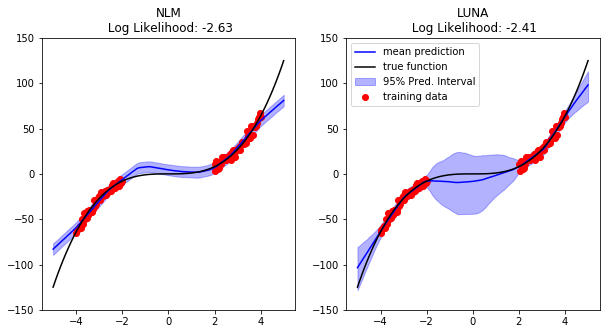

In [10]:
i = 0

fig,ax = plt.subplots(1,2 ,figsize=(10,5))
i = 0
for name, model in {"NLM":nlm,"LUNA":luna}.items():
    predictives, predictive_samples = model.predict(x_test)
    log_l = model.get_log_l(x_train,y_train,x_valid,y_valid)
    name = name + f"\n Log Likelihood: {round(log_l,2)}"
    ax[i]=bh.viz_pp_samples(x_train, y_train,x_test.flatten(),predictive_samples,name, ax[i])
    
    i +=1
plt.legend()
fig.savefig("fig_scratch/LUNA_NLM_Base.png")

### Show LUNA Training Over Time

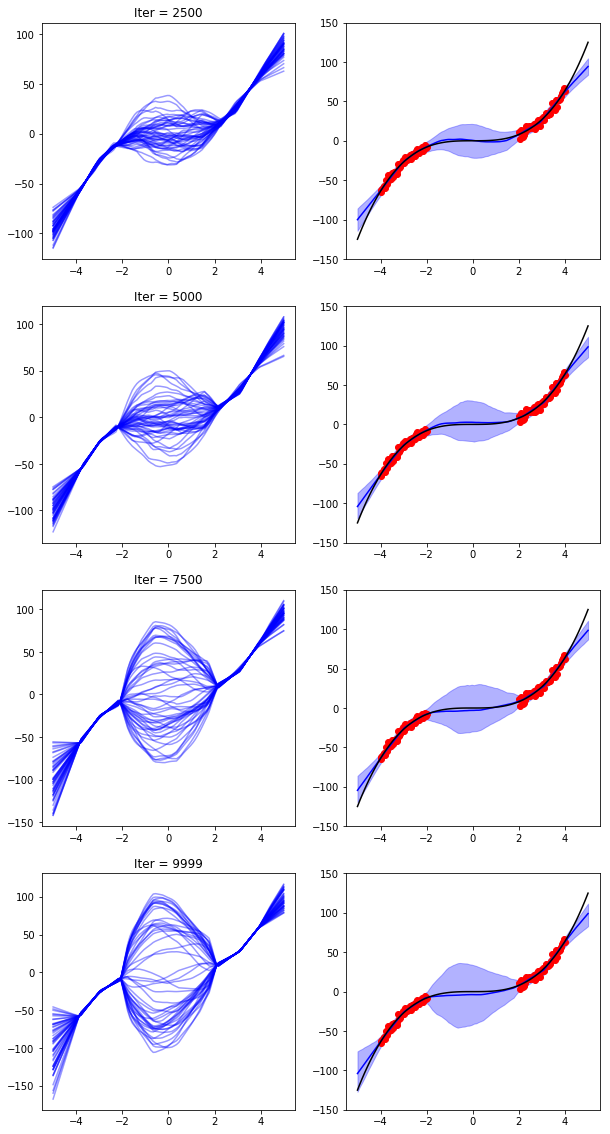

In [38]:
iters = [2500,5000,7500,9999]

luna_snap(luna,iters,x_test,x_train,y_train)